# Purpose:
This notebook tests a large number of different statistical and machine learning methods on a dataset of red wines which contains, for each wine in row i, eleven descriptive characteristics and a score of overall wine quality as determined by a group of wine experts. We can experiment with and compare the performance of a wide range of supervised learning algorithms because the labels are an integer score of 1-10, meaning both regression and classification methods are available for us to use. 

# Data viz:
-pairplots features against quality  
-pairplots all features against all features  
-violinplot  
-correlation matrix heatmap  
-scaled parallel coordinates, mean scaled parallel coordinates  
-gridsearch results  
-score against # of folds, score against # neighbors in knn  

# Algorithms:
-linear regression  
-ridge regression  
-elastic net  
-knn regression  
-knn classification  
-decision tree regression  
-decision tree classification  
-random forest classifier  
-adaboost  
-lasso  
-SVM Regression (multiple kernels)   
-SVM Classification (multiple kernels)  

# Metrics & other:
-custom test/train split  
-k folds  
-stratified k folds  
-null accuracy  
-confusion matrix  
-polynomial preprocessing for regression  
-grid search  
-iterate over number of k folds  
-iterate over number of neighbors for knn  
-iterate knn gridsearch max score over # of folds  
-PCA  

In [1]:
import pandas
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn


In [2]:
# read in red and white data
# we'll focus on the reds dataset

wd = pandas.read_csv('winequality-white.csv', sep=";")
rd = pandas.read_csv('winequality-red.csv', sep=";")

rd[1:5]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
#sort by quality
rd = rd.sort_values(by='quality')

In [4]:
rd.sort_values(by='quality').head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1478            7.1             0.875         0.05             5.7      0.082   
832            10.4             0.440         0.42             1.5      0.145   
899             8.3             1.020         0.02             3.4      0.084   
1374            6.8             0.815         0.00             1.2      0.267   
459            11.6             0.580         0.66             2.2      0.074   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1478                  3.0                  14.0  0.99808  3.40       0.52   
832                  34.0                  48.0  0.99832  3.38       0.86   
899                   6.0                  11.0  0.99892  3.48       0.49   
1374                 16.0                  29.0  0.99471  3.32       0.51   
459                  10.0                  47.0  1.00080  3.25       0.57   

      alcohol  quality  
1478     10.2        3  
832       9.9        3  
899      11.0        3  
1374      9.8        3  
459       9.0        3

In [5]:
# have a look at the basic stats
rd.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
# closer look at variance
rd.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

/Users/nickryan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [8]:
# feature set
list(rd)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

/Users/nickryan/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


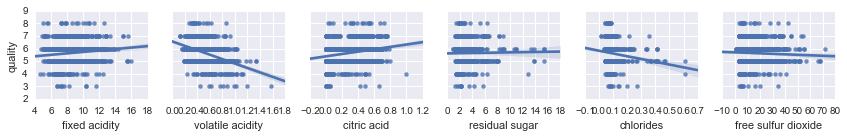

In [9]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 ], y_vars='quality', kind='reg', size=2, aspect=1)

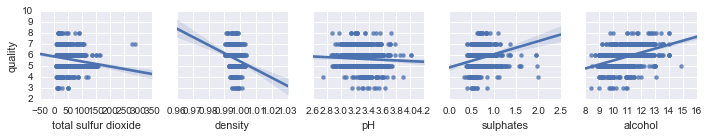

In [10]:
# pairplot against wine quality

sb.pairplot(rd, x_vars=['total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
], y_vars='quality', kind='reg', size=2, aspect=1)

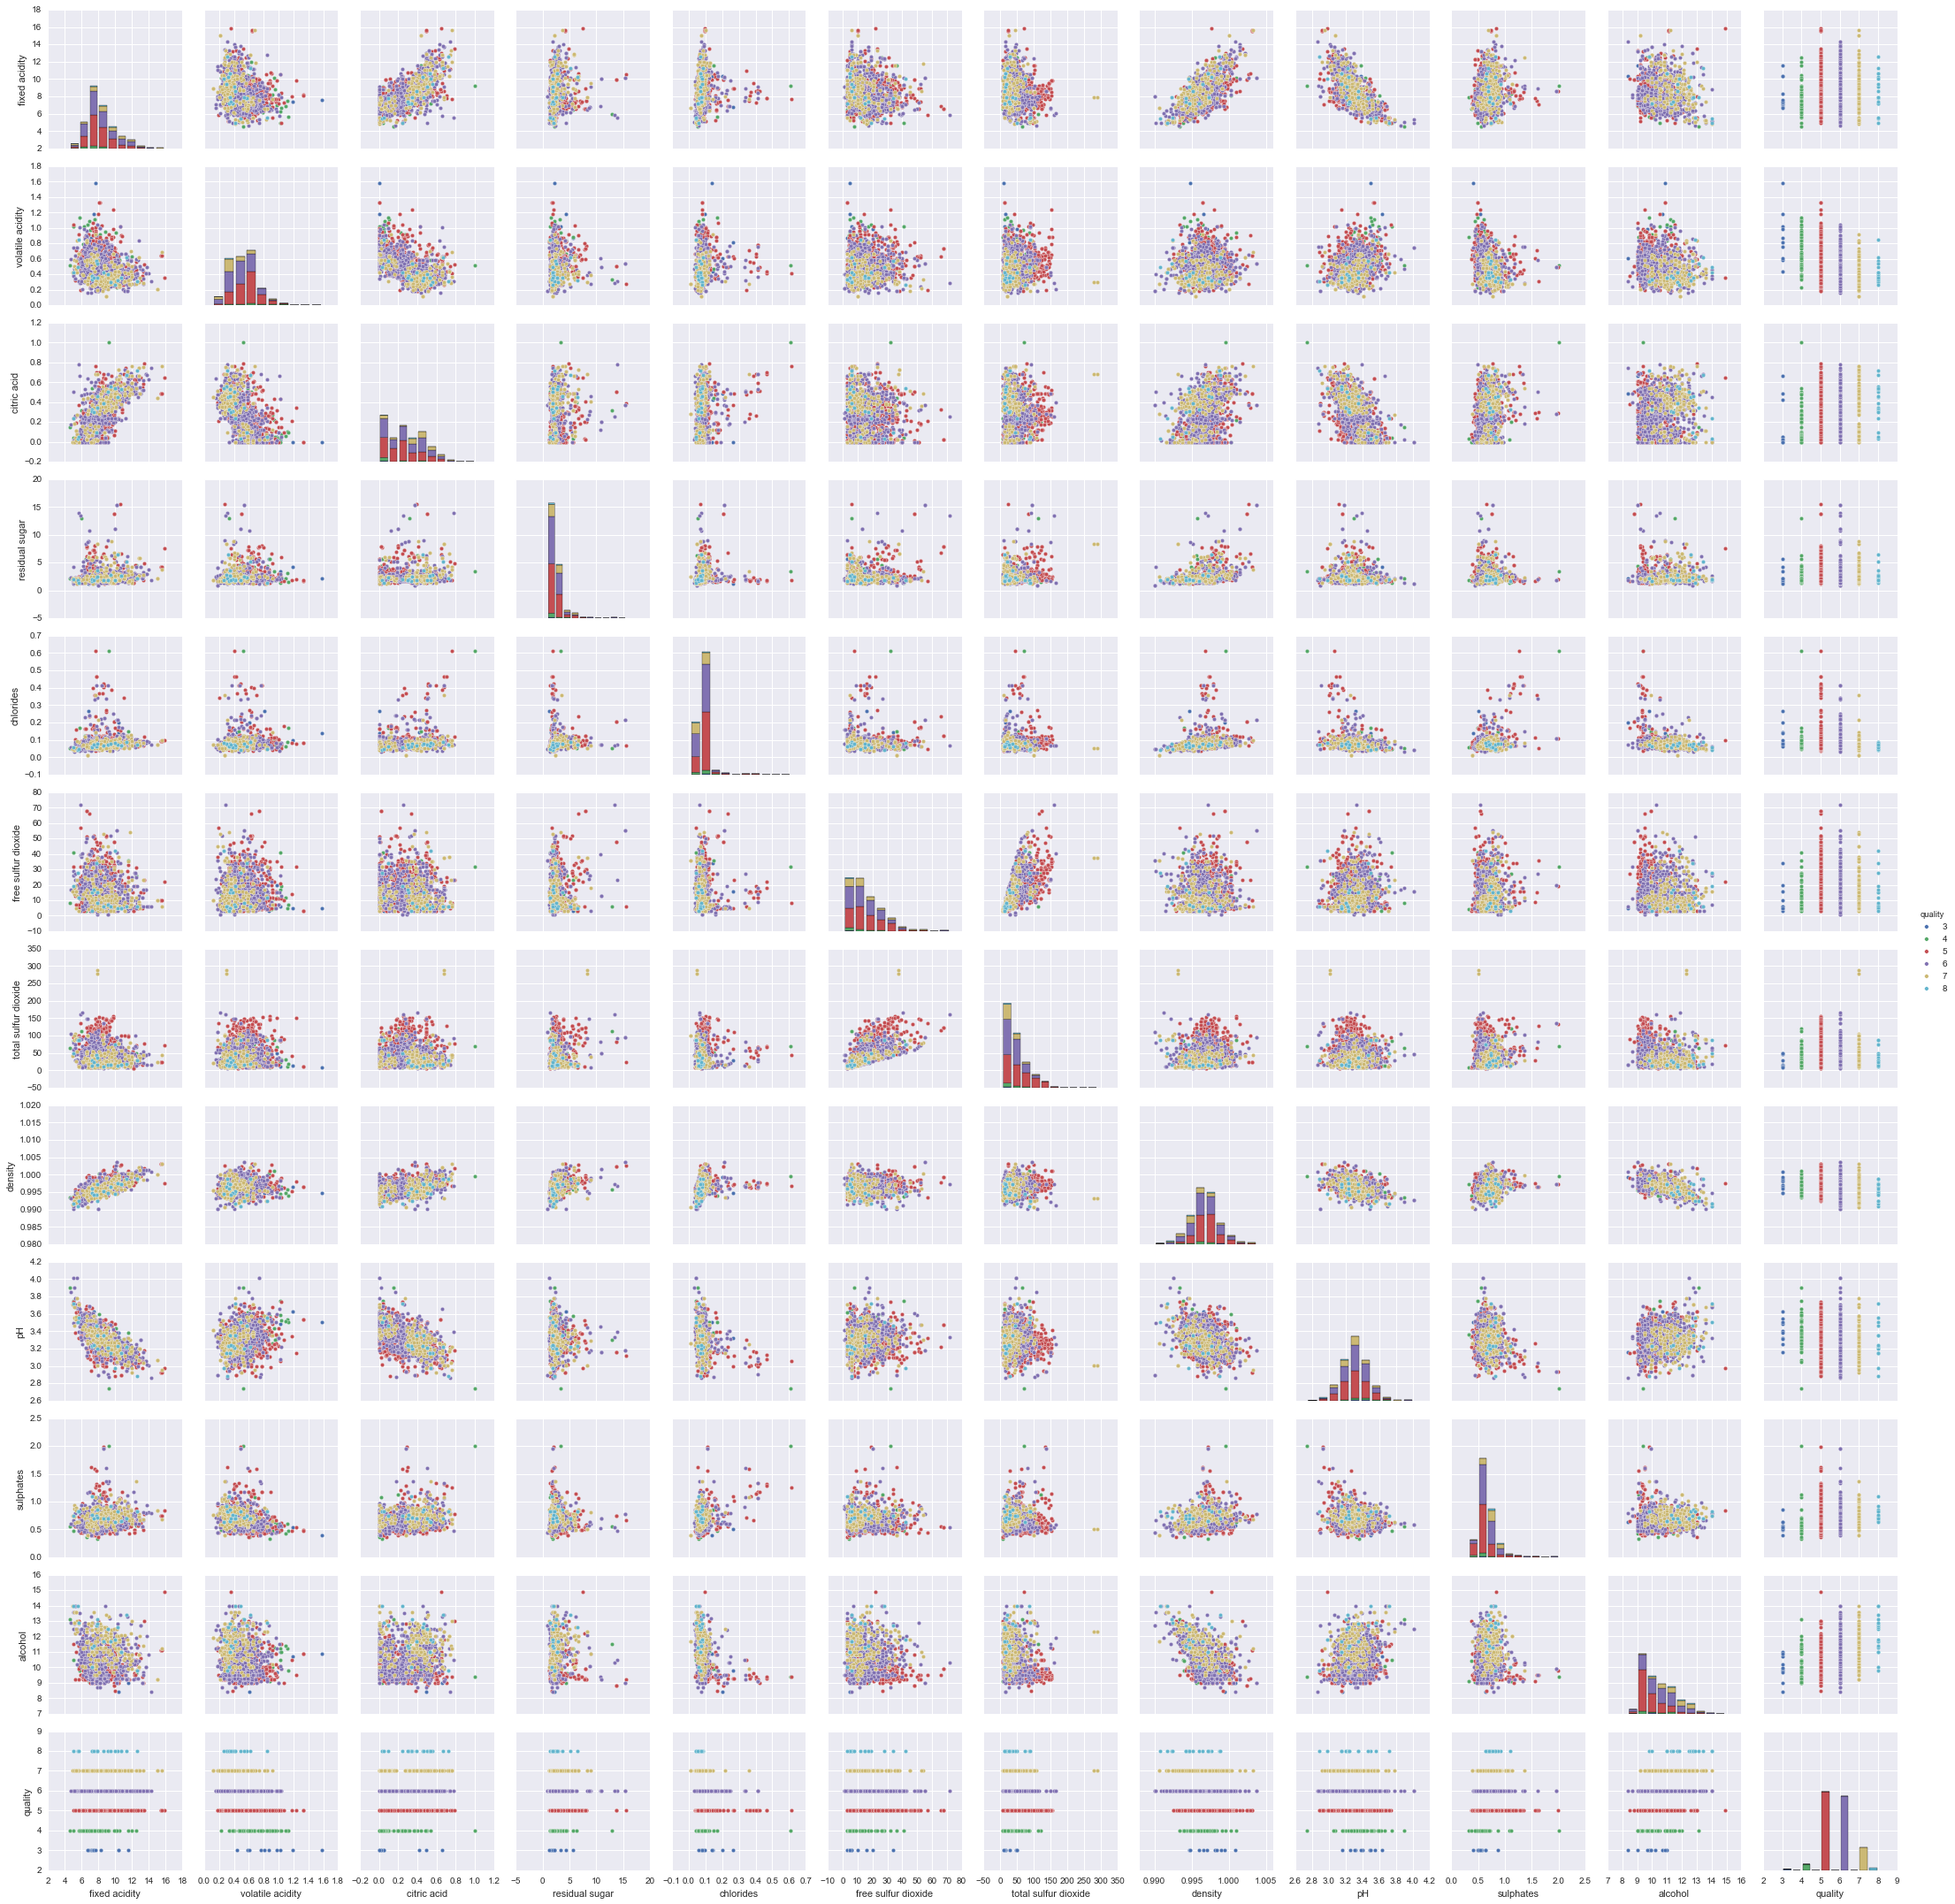

In [11]:
# exploring...

sb.pairplot(rd, hue='quality')

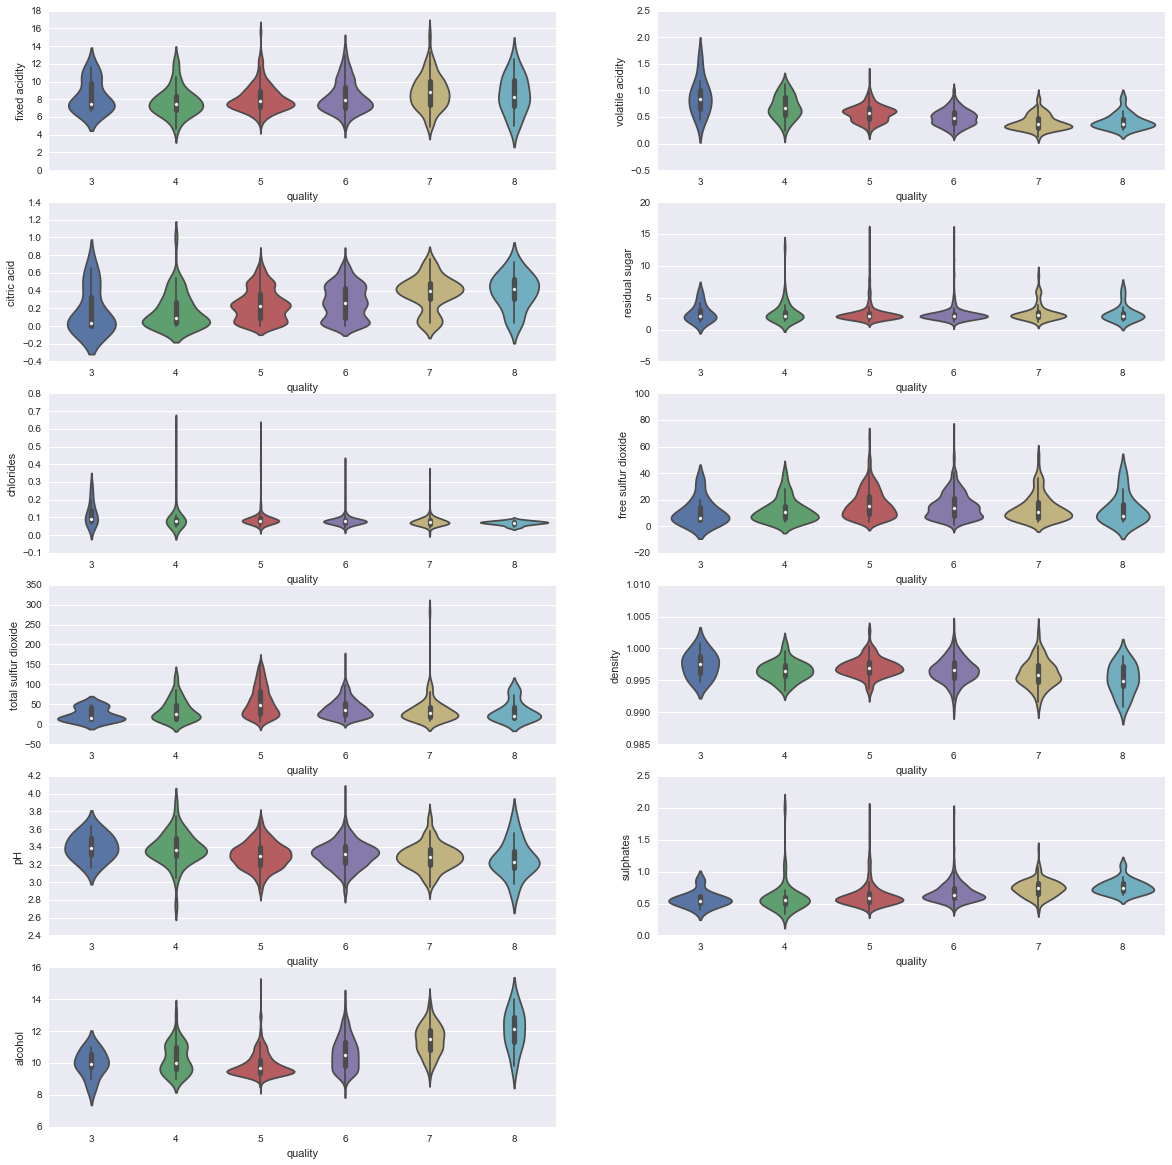

In [12]:
# exploring...

plt.figure(figsize=(20, 20))

for column_index, column in enumerate(rd.columns):
    if column == 'quality':
        continue
    plt.subplot(6, 2, column_index + 1)
    sb.violinplot(x='quality', y=column, data=rd)

KeyError: 'Level network must be same as name (None)'

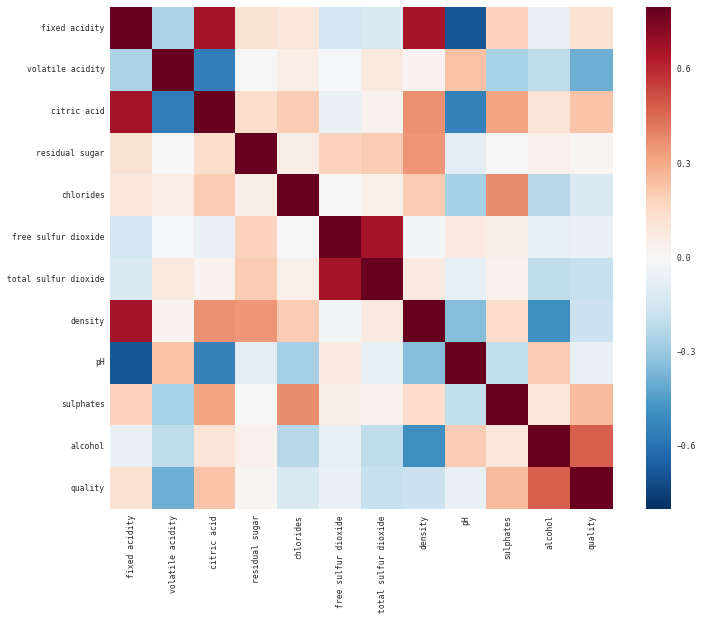

In [13]:
#exploring correlation matrix

corrmat = rd.corr()
sb.set(context="paper", font="monospace")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sb.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

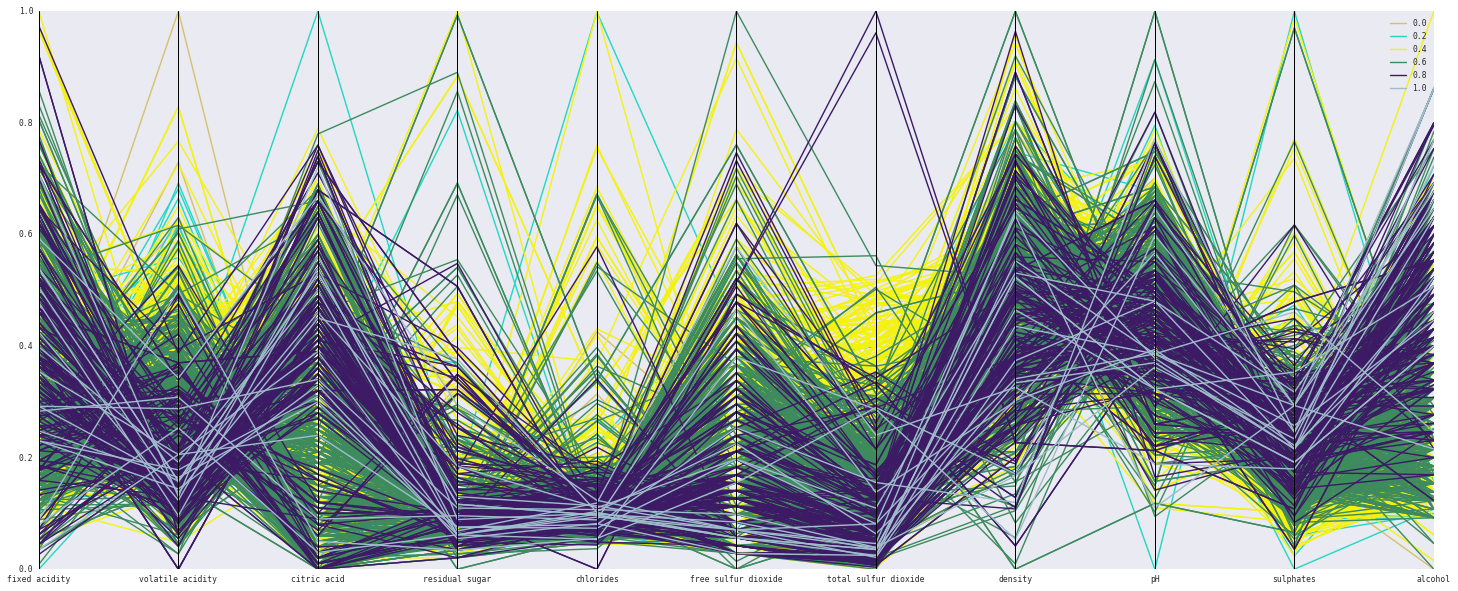

In [14]:
# parallel coordinates graph
from pandas.tools.plotting import parallel_coordinates

# scale all features between 1 and 0 for parallel coordinates graph
def scaler(df):
    for col in df:
        range_of_values = df[col].max() - df[col].min()
        score_minus_min = (df[col]) - (df[col].min())
        df[col] = score_minus_min / range_of_values     
    return df  

# create a copy of rd to avoid rewriting our original dataframe
rd_copy = rd + 0
rd_scaled = scaler(rd_copy)

# plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_scaled, 'quality')

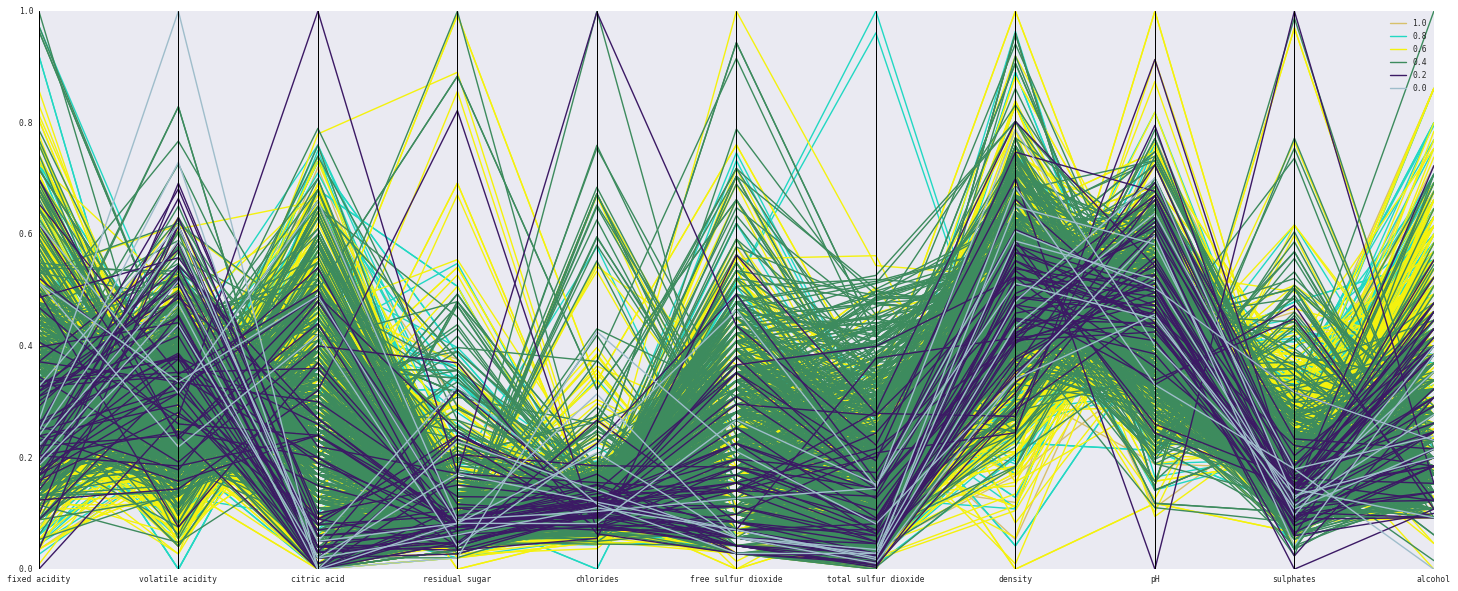

In [15]:
# very interesting, but the default plot puts high quality wine plotlines on top of low quality wine plotlines
# so that the low quality wine data is hidden behind a thicket of plotpoints

# same graph, but with low quality wine data on top. this time, the light blue and purple lines will represent the
# worst quality wine:

# rewrite the red wine dataset with quality descending
rd_quality_descending = rd.sort_values(by='quality', ascending=False)

# scale
rd_quality_descending_scaled = scaler(rd_quality_descending)

#plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_quality_descending_scaled, 'quality')


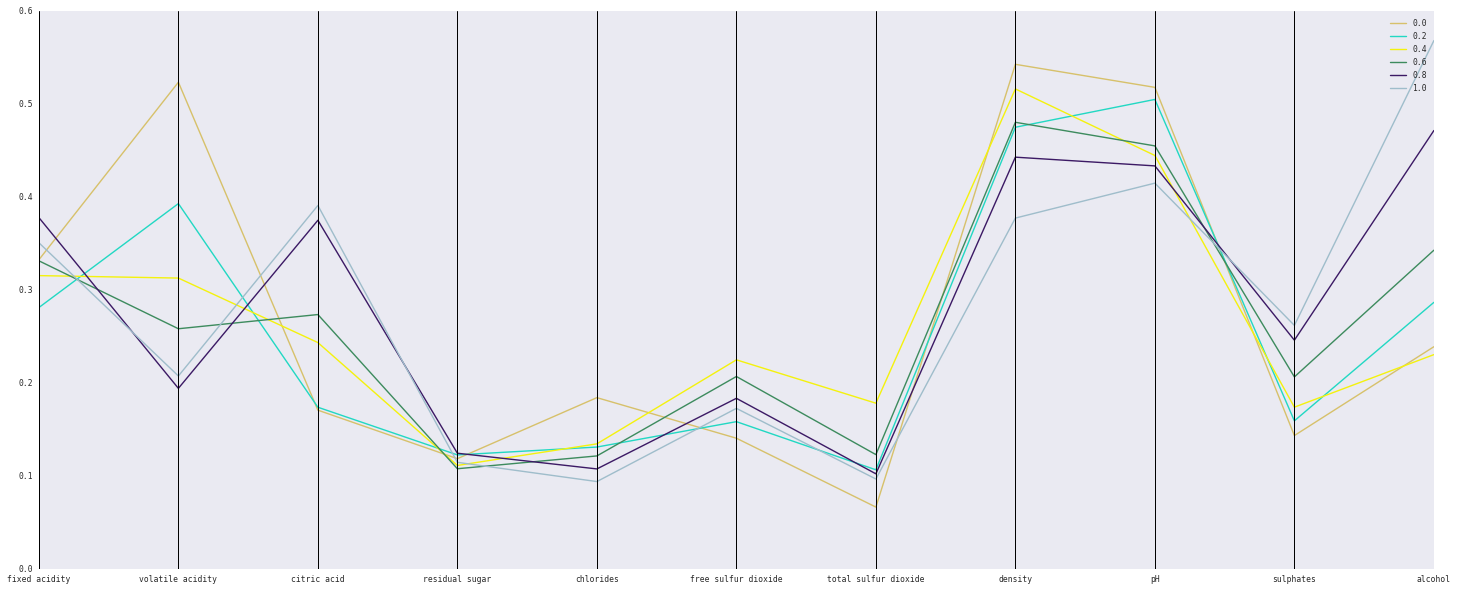

In [16]:
# parallel coordinates graph of mean value for each quality

# mean of scaled
rd_mean = rd_scaled.groupby(['quality']).mean()

# add back in a quality score column after applying groupby
rd_mean['quality'] = [0,.2,.4,.6,.8,1]

# plot
plt.figure(figsize=(25,10))
parallel_coordinates(rd_mean, 'quality')



In [215]:
# split into train and target. We'll use sklearn k-folds, so won't bother splitting off a test set or shuffling

import numpy as np

y = rd['quality']
X = rd.drop('quality', 1)
X = X.as_matrix()
y = y.as_matrix()



# scale and normalize data and target for PCA, SVM, etc.
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y)

# oddly enough, some classifiers expect a target classification of type integer, that is, it recognizes label
# type of int or string, but not float. after scaling y, the target values are floats, so we convert to string
# and store as a variable for later use (see SVM Classifier). For details, see "DataConversionWarning" below in output 
y_str = y_scaled.astype('str')

/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will rais

null accuracy: predict 5 for every wine and be right 42.58912% of the time


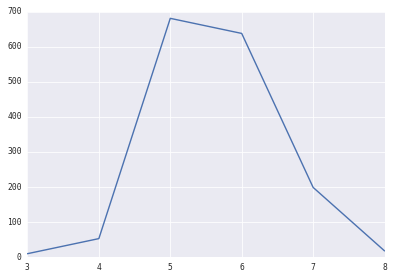

In [18]:
# distribution of wines quality scores
y1 = pandas.Series(y)
values = pandas.DataFrame(y1.value_counts())
plt.plot(values.sort_index())

# caculate null accuracy
null_accuracy = y1.value_counts().head(1) / len(y1)
print "null accuracy: predict 5 for every wine and be right %.5f%% of the time" % (null_accuracy * 100)

In [19]:
#quick check

print "Target vector:",y.shape
print "Feature matrix",X.shape

Target vector: (1599,)
Feature matrix (1599, 11)


In [20]:
# kfolds on linear regression

from sklearn import cross_validation

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40004144  0.26456988  0.33977338  0.40538395  0.21395995  0.29541643
  0.41695819  0.34149024  0.33511432  0.40965153]


Accuracy: 34.224% (+/- 6.496%)


In [21]:
# startified k folds on linear regression

num_folds = 10
num_instances = len(X)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=stratifiedkfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.36139017  0.38592894  0.35018887  0.3773134   0.29748722  0.24200208
  0.4167284   0.26897369  0.45134074  0.34356304]


Accuracy: 34.949% (+/- 6.157%)


In [22]:
# k folds on ridge regression, check performance with L2 regularization

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(normalize=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.40252252  0.26411366  0.33831344  0.4082061   0.2150958   0.29802188
  0.4171128   0.34021428  0.33575812  0.41007839]


Accuracy: 34.294% (+/- 6.517%)


In [23]:
# try stratified k folds on linear ridge regression, this time preprocessing X to get polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# convert X to polynomial degree 2 form
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
print "Array X has shape:", np.shape(X)
print "Array X_poly with degree 2 has shape:", np.shape(X_poly)

num_folds = 20
num_instances = len(X)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.RidgeCV(fit_intercept=True, normalize=False)


results = cross_validation.cross_val_score(model, X_poly, y, cv=stratifiedkfold)

print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)


Array X has shape: (1599, 11)
Array X_poly with degree 2 has shape: (1599, 78)


/Users/nickryan/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 10 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=20.
  % (min_labels, self.n_folds)), Warning)


Accuracy: 36.538% (+/- 8.328%)


In [24]:
# try hand-selecting features, label new set as X2

X2 = rd.drop(['quality','residual sugar','chlorides','free sulfur dioxide','pH'],1)

num_folds = 10
num_instances = len(X2)
seed = 6
stratifiedkfold = cross_validation.StratifiedKFold(y, n_folds=num_folds, random_state=seed, shuffle=True)

#try L2 regularization with a sparser feature set
model = sklearn.linear_model.RidgeCV(normalize=False)

#scoring
results = cross_validation.cross_val_score(model, X2, y, cv=stratifiedkfold)
print "Fold scores:", results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

#feature coefficients
model = model.fit(X, y)
print '\n'
print "Parameter coefficients:"
pandas.DataFrame(zip(list(X2),model.coef_))


Fold scores: [ 0.35546308  0.36992146  0.32875545  0.35525358  0.32406225  0.25699643
  0.43277408  0.23598666  0.44571807  0.3296179 ]


Accuracy: 34.345% (+/- 6.263%)


Parameter coefficients:


0         1
0         fixed acidity  0.009056
1      volatile acidity -1.099029
2           citric acid -0.187014
3  total sulfur dioxide  0.008843
4               density -1.829590
5             sulphates  0.004505
6               alcohol -0.003297

In [25]:
# lasso (L1 regularization) with our smaller, hand-picked feature set (X2)

num_folds = 10
num_instances = len(X2)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.Lasso(alpha=.01)

results = cross_validation.cross_val_score(model, X2, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.3842335   0.27007285  0.32142699  0.39591393  0.17649335  0.30514304
  0.39882258  0.29790053  0.3030387   0.39716977]


Accuracy: 32.502% (+/- 6.774%)


In [26]:
# elastic net (L1 and L2 regularization)

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.linear_model.ElasticNet(alpha=.01, l1_ratio=0.5)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.39460639  0.26374052  0.32424054  0.39166999  0.17762252  0.30752224
  0.3962456   0.31079655  0.31117851  0.39846884]


Accuracy: 32.761% (+/- 6.773%)


In [156]:
np.shape(y)

(1599,)

In [224]:
# SVM regression

num_folds = 10
num_instances = len(X_scaled)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.svm.SVR(kernel='rbf', C=1, gamma='auto')

results = cross_validation.cross_val_score(model, X_scaled, y_scaled, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.44455217  0.41174253  0.41197978  0.45347426  0.31670841  0.29592278
  0.48292425  0.39960854  0.33220614  0.48030097]


Accuracy: 40.294% (+/- 6.382%)


In [146]:
#pandas.DataFrame(X_scaled)
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [221]:
# k-nearest neighbors regression, since we happen to have labels that can be treated as continous (open set (1,10)) 
# or discrete (integer score of [1..10]) -- this problem can be treated as either classification or regression
from sklearn.neighbors import KNeighborsRegressor

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=7)


results = cross_validation.cross_val_score(model, X_scaled, y_scaled, cv=kfold)
#print results
#print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)



Accuracy: 30.488% (+/- 5.823%)


In [216]:
# SVM classification

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = sklearn.svm.SVC(kernel='rbf', C=1, gamma='auto')

# Y = np.asarray(critics['fresh'], dtype="|S6")

results = cross_validation.cross_val_score(model, X_scaled, y_str, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.58125     0.68125     0.58125     0.625       0.61875     0.56875
  0.73125     0.6         0.65        0.63522013]


Accuracy: 62.727% (+/- 4.774%)


In [42]:
# decision tree regressor

from sklearn.tree import DecisionTreeRegressor

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = DecisionTreeRegressor(random_state=6, criterion='mse', splitter='best', max_depth=6)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)


[ 0.39965871  0.25962133  0.39854386  0.32647467  0.18565331  0.25547314
  0.30256257  0.31470946  0.12449723  0.27387663]


Accuracy: 28.411% (+/- 8.137%)


In [227]:
# decision tree classifier

from sklearn.tree import DecisionTreeClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = DecisionTreeClassifier(random_state=6, criterion='gini', splitter='best')

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

# visualization available here:
# http://scikit-learn.org/stable/modules/tree.html#tree


[ 0.6375      0.65        0.65625     0.64375     0.6         0.575
  0.59375     0.7         0.60625     0.66037736]


Accuracy: 63.229% (+/- 3.593%)


In [120]:
# random forest
from sklearn.ensemble import RandomForestClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = RandomForestClassifier(random_state=6, n_estimators=20, bootstrap=False)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.73125     0.7         0.73125     0.7125      0.7         0.64375
  0.7125      0.725       0.70625     0.67924528]


Accuracy: 70.417% (+/- 2.520%)


In [127]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier

num_folds = 10
num_instances = len(X)
seed = 6
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed, shuffle=True)

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(), 
                           random_state=6, learning_rate=1, n_estimators=10)

results = cross_validation.cross_val_score(model, X, y, cv=kfold)
print results
print '\n'
print("Accuracy: %.3f%% (+/- %.3f%%)") % (results.mean()*100.0, results.std()*100.0)

[ 0.675       0.675       0.7         0.7         0.70625     0.61875
  0.7125      0.68125     0.6875      0.72327044]


Accuracy: 68.795% (+/- 2.765%)


In [107]:
# k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3)

#knn
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print accuracy_score(y_test, y_pred)

0.477083333333


In [46]:
# find best neighbor size
k_range = range(1,40)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
   

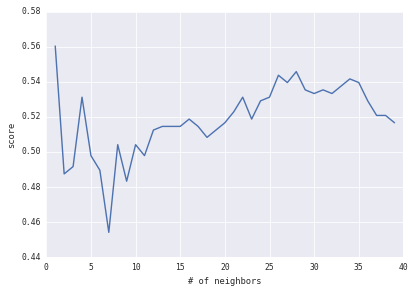

In [47]:
plt.plot(k_range,scores)
plt.xlabel("# of neighbors")
plt.ylabel("score")

In [49]:
# k-nearest neighbor with CV k-folds, optimizing number of folds
from sklearn.cross_validation import cross_val_score

fold_range = range(5,30)
scores = []
for f in fold_range:
    knn = KNeighborsClassifier(n_neighbors = 19)
    indscores = cross_val_score(knn, X, y, cv=f, scoring = 'accuracy')
    indscore = indscores.mean()
    scores.append(indscore)

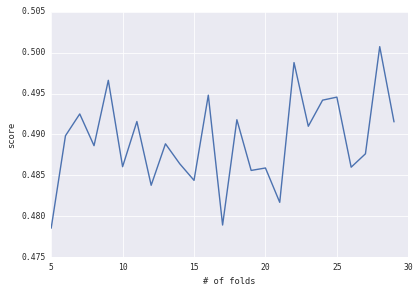

In [50]:
plt.plot(fold_range,scores)
plt.xlabel("# of folds")
plt.ylabel("score")

In [135]:
# gridsearch parameter tuning weights and # of neighbors
from sklearn.grid_search import GridSearchCV

k_range = range(1,25)
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights = weight_options)

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv = 25, scoring='accuracy')
grid.fit(X,y)

print grid.best_score_
print grid.best_params_

#return best params on gridsearch, iterate over number of folds

0.555347091932
{'n_neighbors': 24, 'weights': 'distance'}


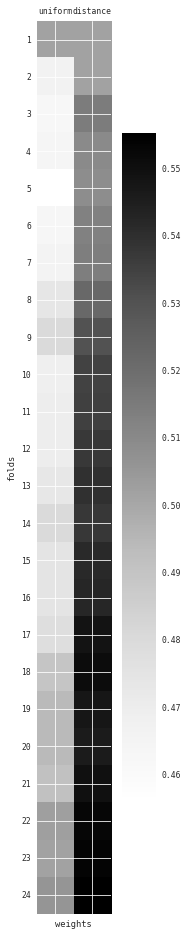

In [141]:
# practice visualizing gridsearch results

%matplotlib inline

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(24,2)

plt.matshow(scores)
plt.xlabel('weights')
plt.ylabel('folds')
plt.colorbar()
plt.xticks(np.arange(2), weight_options)
plt.yticks(np.arange(24), k_range);

In [52]:
# check best score returned by gridsearchcv over a range of values for # of folds

scores=[]
params=[]
f_range = range(15,25)
for f in f_range:
    k_range = range(1,40)
    weight_options = ['uniform', 'distance']
    param_grid = dict(n_neighbors=k_range, weights = weight_options)
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = f, scoring='accuracy')
    grid.fit(X,y)
    scores.append(grid.best_score_)
    params.append(grid.best_params_)
    
for n in zip(f_range,scores,params):
    print n

(15, 0.5434646654158849, {'n_neighbors': 35, 'weights': 'distance'})
(16, 0.55284552845528456, {'n_neighbors': 33, 'weights': 'distance'})
(17, 0.54846779237023136, {'n_neighbors': 33, 'weights': 'distance'})
(18, 0.54909318323952472, {'n_neighbors': 35, 'weights': 'distance'})
(19, 0.5522201375859912, {'n_neighbors': 33, 'weights': 'distance'})
(20, 0.55847404627892427, {'n_neighbors': 33, 'weights': 'distance'})
(21, 0.56285178236397748, {'n_neighbors': 39, 'weights': 'distance'})
(22, 0.56097560975609762, {'n_neighbors': 30, 'weights': 'distance'})
(23, 0.56160100062539087, {'n_neighbors': 33, 'weights': 'distance'})
(24, 0.56097560975609762, {'n_neighbors': 33, 'weights': 'distance'})


best score and # of neighbors: (0.56285178236397748, 21)


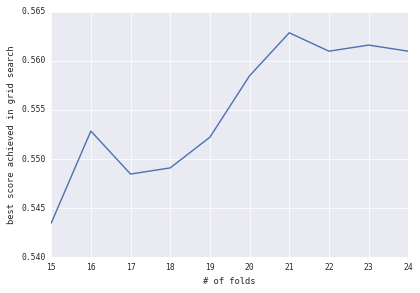

In [58]:
# plot best gridsearch score achieved for each # of folds

plt.plot(f_range,scores)
plt.xlabel("# of folds")
plt.ylabel("best score achieved in grid search")

print "best score and # of neighbors:", max(zip(scores,f_range))

In [59]:
# confusion matrix

from sklearn import cross_validation
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors = 39)
knn.fit(X_train, y_train)
y_pred = cross_validation.cross_val_predict(knn, X, y, cv=21)

print metrics.confusion_matrix(y, y_pred)

[[  0   0   5   5   0   0]
 [  0   0  30  22   1   0]
 [  0   0 462 216   3   0]
 [  0   0 287 337  14   0]
 [  0   0  51 130  18   0]
 [  0   0   4  13   1   0]]


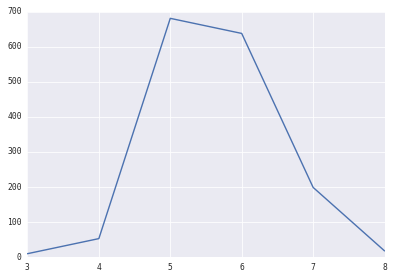

In [60]:
y1 = pandas.Series(y)
values = pandas.DataFrame(y1.value_counts())
plt.plot(values.sort_index())


In [61]:
# caculate null accuracy
null_accuracy = y1.value_counts().head(1) / len(y1)

print "null accuracy: predict 5 and be right %.5f%% of the time" % null_accuracy


null accuracy: predict 5 and be right 0.42589% of the time


In [165]:
# Principal Component Analysis
from sklearn.decomposition import PCA

for n in range(1,11):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    X_reduce = pca.transform(X_scaled)
    print n, "dimensions: %f5%% variance captured" % (pca.explained_variance_ratio_.sum() * 100)


1 dimensions: 28.1739315% variance captured
2 dimensions: 45.6822015% variance captured
3 dimensions: 59.7780515% variance captured
4 dimensions: 70.8074385% variance captured
5 dimensions: 79.5282755% variance captured
6 dimensions: 85.5247145% variance captured
7 dimensions: 90.8319065% variance captured
8 dimensions: 94.6769675% variance captured
9 dimensions: 97.8100775% variance captured
10 dimensions: 99.4585615% variance captured
